# Install moduels & packages

In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install streamlit plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# import the necessary the modules & packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


# Review the Raw Dataset

Before any cleaning or feature engineering, we must inspect the dataset exactly as received. This initial review helps us understand the data structure, spot obvious quality issues, and plan a clear, repeatable cleaning strategy.

In [7]:
df = pd.read_csv("../data/raw/Weekly_HospitaWeekly_Hospital_Respiratory_Data.csv")
df.head()


C:\Users\Chaima Ben slima\AppData\Local\Temp\ipykernel_6180\3631600112.py:1: DtypeWarning: Columns (317) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/Weekly_HospitaWeekly_Hospital_Respiratory_Data.csv")


,Week Ending Date,Geographic aggregation,Number of Inpatient Beds,Number of Adult Inpatient Beds,Number of Pediatric Inpatient beds,Number of Inpatient Beds Occupied,Number of Adult Inpatient Beds Occupied,Number of Pediatric Inpatient Beds Occupied,Number of ICU Beds,Number of Adult ICU Beds,...,Absolute Change in the Percent Hospitals Reporting Percent Hospitalized Adult Patients with Influenza in the ICU from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Hospitalized Pediatric Patients with Influenza in the ICU from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Hospitalized Patients with RSV in the ICU from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Hospitalized Adult Patients with RSV in the ICU from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Hospitalized Pediatric Patients with RSV in the ICU from Prior Week,Respiratory Virus Season,Cumulative Seasonal Total Confirmed New COVID-19 Admissions,Cumulative Seasonal Total Confirmed New Influenza Admissions,Cumulative Seasonal Total Confirmed New RSV Admissions,"Cumulative Seasonal Total Confirmed New Respiratory Admissions (COVID-19, Influenza, and RSV)"
0,2025-06-07,MA,15603.0,14281.0,1322.0,13138.0,12273.0,865.0,1601.0,1201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-06-07,OH,29105.0,25201.0,3883.0,20880.0,18664.0,2216.0,4538.0,3540.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-06-07,AZ,9115.0,8068.0,864.0,6575.0,5877.0,634.0,1548.0,1073.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-06-07,PR,7719.0,5073.0,675.0,3905.0,3610.0,286.0,532.0,497.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-06-07,SD,2582.0,2182.0,380.0,1750.0,1510.0,238.0,349.0,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# List All Column Names
Reviewing column names early helps us understand what fields are available, detect naming inconsistencies (typos, duplicates, extra spaces, mixed casing), and identify columns that may require standardization or cleaning before further analysis.

In [8]:
for col in df.columns:
    print(col)


Week Ending Date
Geographic aggregation
Number of Inpatient Beds
Number of Adult Inpatient Beds
Number of Pediatric Inpatient beds
Number of Inpatient Beds Occupied
Number of Adult Inpatient Beds Occupied
Number of Pediatric Inpatient Beds Occupied
Number of ICU Beds
Number of Adult ICU Beds
Number of Pediatric ICU Beds
Number of ICU Beds Occupied
Number of Adult ICU Beds Occupied
Number of Pediatric ICU Beds Occupied
Number of Adult Patients Hospitalized with COVID-19
Number of Pediatric Patients Hospitalized with COVID-19
Total Patients Hospitalized with COVID-19
Number of  Adult Patients Hospitalized with Influenza
Number of Pedatric Patients Hospitalized with Influenza
Total Patients Hospitalized with Influenza
Number of Adult Patients Hospitalized with RSV
Number of Pediatric Patients Hospitalized with RSV
Total Patients Hospitalized with RSV
Number of Adult ICU Patients Hospitalized with COVID-19
Number of Pediatric ICU Patients Hospitalized with COVID-19
Total ICU Patients Hospi

# Select and Organize the Key Variables for Analysis

In this step, we build a more comprehensive working dataset by selecting not only the core identifiers and bed capacity fields, but also disease-specific hospitalization signals (COVID-19, Influenza, and RSV for both inpatient and ICU) and hospital reporting coverage metrics. Keeping these additional variables strengthens the analysis by capturing demand drivers behind occupancy and providing context on data completeness, while preserving the target occupancy percentages needed for modeling and stress assessment.

In [9]:
id_cols = ["Week Ending Date", "Geographic aggregation"]

capacity_cols = [
    "Number of Inpatient Beds",
    "Number of Inpatient Beds Occupied",
    "Number of ICU Beds",
    "Number of ICU Beds Occupied",
]


disease_cols = [
    "Total Patients Hospitalized with COVID-19",
    "Total Patients Hospitalized with Influenza",
    "Total Patients Hospitalized with RSV",
    "Total ICU Patients Hospitalized with COVID-19 ",
    "Total ICU Patients Hospitalized with Influenza",
    "Total ICU Patients Hospitalized with RSV",
]


reporting_cols = [
    "Number Hospitals Reporting Number of Inpatient Beds",
    "Number Hospitals Reporting Number of ICU Beds ",
    "Percent Hospitals Reporting Number of Inpatient Beds",
    "Percent Hospitals Reporting Number of ICU Beds ",
]

target_cols = [
    "Percent Inpatient Beds Occupied",
    "Percent ICU Beds Occupied",
]

cols_to_keep = id_cols + capacity_cols + disease_cols + reporting_cols + target_cols

df_clean = df[cols_to_keep].copy()
df_clean.head()



,Week Ending Date,Geographic aggregation,Number of Inpatient Beds,Number of Inpatient Beds Occupied,Number of ICU Beds,Number of ICU Beds Occupied,Total Patients Hospitalized with COVID-19,Total Patients Hospitalized with Influenza,Total Patients Hospitalized with RSV,Total ICU Patients Hospitalized with COVID-19,Total ICU Patients Hospitalized with Influenza,Total ICU Patients Hospitalized with RSV,Number Hospitals Reporting Number of Inpatient Beds,Number Hospitals Reporting Number of ICU Beds,Percent Hospitals Reporting Number of Inpatient Beds,Percent Hospitals Reporting Number of ICU Beds,Percent Inpatient Beds Occupied,Percent ICU Beds Occupied
0,2025-06-07,MA,15603.0,13138.0,1601.0,1257.0,74.0,17.0,6.0,4.0,5.0,0.0,78,78,88.64,88.64,84.20,78.51
1,2025-06-07,OH,29105.0,20880.0,4538.0,3317.0,61.0,18.0,15.0,14.0,3.0,5.0,195,190,91.12,88.79,71.74,73.09
2,2025-06-07,AZ,9115.0,6575.0,1548.0,964.0,70.0,10.0,6.0,7.0,1.0,1.0,71,66,71.72,66.67,72.13,62.27
3,2025-06-07,PR,7719.0,3905.0,532.0,375.0,58.0,70.0,1.0,4.0,14.0,0.0,36,36,65.45,65.45,50.59,70.49
4,2025-06-07,SD,2582.0,1750.0,349.0,158.0,3.0,1.0,2.0,0.0,0.0,0.0,54,35,87.10,56.45,67.78,45.27


# Standardize the Date Field and Sort the Dataset for Time-Series Readiness
This step converts the “Week Ending Date” column into a proper datetime format to ensure accurate time-based operations (filtering, grouping, rolling calculations, and forecasting). After standardizing the date, we sort the dataset by geographic level and date to create a clean chronological order for each region, which is essential for reliable trend analysis and any time-series modeling.

In [10]:
df_clean.columns = df_clean.columns.str.strip()
df_clean["Week Ending Date"] = pd.to_datetime(df_clean["Week Ending Date"], errors="coerce")
df_clean = df_clean.dropna(subset=["Week Ending Date", "Geographic aggregation"])

df_clean = df_clean.sort_values(["Geographic aggregation", "Week Ending Date"]).reset_index(drop=True)

# Identify Missing Values and Remove Incomplete Records

In this step, we quantify missing values across all selected variables to understand the extent and location of data gaps. After reviewing which fields contain the most missing entries, we remove rows with null values to ensure the dataset used for analysis and modeling is complete, consistent, and free from records that could introduce bias or errors during training.

In [11]:
df_clean["Week Ending Date"] = pd.to_datetime(df_clean["Week Ending Date"])
df_clean = df_clean.sort_values(["Geographic aggregation", "Week Ending Date"])

# Convert Key Fields to Numeric Format for Reliable Analysis
In this step, we ensure that all capacity, disease, reporting, and target occupancy columns are stored as numeric values. Converting these fields to numeric format prevents calculation errors and enables valid aggregation, visualization, and modeling. Any values that cannot be interpreted as numbers are safely coerced into missing values, allowing us to handle invalid entries consistently during the subsequent cleaning stages.

In [12]:
numeric_cols = capacity_cols + disease_cols + reporting_cols + target_cols
numeric_cols = [c.strip() for c in numeric_cols] 
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")


# Standardize Occupancy Percentage Units
This step ensures that occupancy rate fields are consistently expressed as percent values (0–100). Some datasets store percentages as proportions (0–1), while others store them as true percentages. By checking the maximum value and scaling when needed, we eliminate unit inconsistencies and make the occupancy metrics directly comparable across all records, which is critical for accurate visualization, thresholding, and modeling.

In [21]:
pct_cols = ["Percent Inpatient Beds Occupied", "Percent ICU Beds Occupied"]
for col in pct_cols:
    if df_clean[col].max() <= 150:
        df_clean[col] = df_clean[col] * 100


# Create Lag Features to Capture Week-to-Week Occupancy Trends
This step engineers one-week lag variables for ICU and inpatient occupancy percentages within each geographic group. By shifting the previous week’s occupancy values forward, we create features that represent recent historical conditions which can be an essential signal for forecasting and trend-based modeling. After generating these lag features, we drop the initial rows in each geographic series where lag values are unavailable to keep the dataset complete and model-ready.

In [124]:
df_clean["icu_pct_last_week"] = (
    df_clean.groupby("Geographic aggregation")["Percent ICU Beds Occupied"].shift(1)
)

df_clean["inpatient_pct_last_week"] = (
    df_clean.groupby("Geographic aggregation")["Percent Inpatient Beds Occupied"].shift(1)
)

df_clean = df_clean.dropna()


# Aggregate Weekly Occupancy Metrics by Geography
In this step, we group the cleaned dataset by geographic level and week-ending date, then compute the average ICU and inpatient occupancy percentages for each group-week combination. This aggregation produces a consistent weekly time series per region, reduces record-level noise, and creates a structured dataset that is easier to analyze, visualize, and use for forecasting models.

In [125]:
state_week = (
    df_clean
    .groupby(["Geographic aggregation", "Week Ending Date"])
    .agg({
        "Percent ICU Beds Occupied": "mean",
        "Percent Inpatient Beds Occupied": "mean"
    })
    .reset_index()
)
state_week.head()

,Geographic aggregation,Week Ending Date,Percent ICU Beds Occupied,Percent Inpatient Beds Occupied
0,AK,2024-11-16,60.0,72.0
1,AK,2024-11-23,59.0,73.0
2,AK,2024-11-30,55.0,71.0
3,AK,2024-12-07,62.0,74.0
4,AK,2024-12-14,58.0,71.0


# How many states we have in the dataset ?
This step checks how many unique geographic groups are present after weekly aggregation. Confirming the number of distinct regions ensures the dataset still includes the expected geographic coverage and helps verify that no locations were unintentionally removed during filtering, cleaning, or grouping.



In [126]:
state_week["Geographic aggregation"].nunique()


67

In [127]:
sorted(state_week["Geographic aggregation"].unique())


['AK',
 'AL',
 'AR',
 'AS',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MP',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'Region 1',
 'Region 10',
 'Region 2',
 'Region 3',
 'Region 4',
 'Region 5',
 'Region 6',
 'Region 7',
 'Region 8',
 'Region 9',
 'SC',
 'SD',
 'TN',
 'TX',
 'USA',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

### Valid U.S. states (50)

Examples:

AK, AL, AZ, CA, NY, TX, WA, etc.

### U.S. territories (NOT states)
AS  → American Samoa
GU  → Guam
MP  → Northern Mariana Islands
PR  → Puerto Rico
VI  → U.S. Virgin Islands

### Federal / Regional aggregates (NOT states)
USA        → National aggregate
Region 1–10 → HHS regions
DC         → District of Columbia (not a state)

# Define the ONLY 50 U.S. states 

This step creates a reference list containing only the 50 U.S. states (two-letter abbreviations). Using a standardized state list allows us to validate geographic labels, filter out non-state entries (e.g., territories, regions, or unknown categories), and ensure our analysis is strictly based on consistent state-level data.

In [23]:
US_STATES = [
    "AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA",
    "HI","IA","ID","IL","IN","KS","KY","LA","ME","MD",
    "MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ",
    "NM","NY","NC","ND","OH","OK","OR","PA","RI","SC",
    "SD","TN","TX","UT","VT","VA","WA","WI","WV","WY"
]


# Filter the dataset to ONLY 50 states

In this step, we restrict the aggregated weekly dataset to state-level records only by keeping rows where the geographic label matches the official list of 50 U.S. state abbreviations. This removes non-state entries (such as territories, multi-state regions, or other aggregations) and ensures the dataset is consistent, comparable across locations, and aligned with our intended scope of analysis. 

In [24]:
df_clean = df_clean[df_clean["Geographic aggregation"].isin(US_STATES)].copy()

# Verify the cleaning
This final validation step confirms that the filtering worked correctly by counting the number of unique geographic entries in the cleaned dataset. The result should equal 50, ensuring that only the 50 U.S. states are included and that no territories, regions, or unexpected categories remain.

In [25]:
df_clean["Geographic aggregation"].nunique()


50

In [26]:
sorted(df_clean["Geographic aggregation"].unique())


['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [27]:
for col in numeric_cols:
    med = df_clean.groupby("Geographic aggregation")[col].transform("median")
    df_clean[col] = df_clean[col].fillna(med)


df_rich = df_clean.dropna(subset=pct_cols).reset_index(drop=True)


# 1- Dataset Overview

This table summarizes the cleaned dataset. It shows that ICU and inpatient bed occupancy percentages stay within realistic limits, and after cleaning there are no extreme or impossible values left in the data.

In [28]:
df_clean.describe()


,Week Ending Date,Number of Inpatient Beds,Number of Inpatient Beds Occupied,Number of ICU Beds,Number of ICU Beds Occupied,Total Patients Hospitalized with COVID-19,Total Patients Hospitalized with Influenza,Total Patients Hospitalized with RSV,Total ICU Patients Hospitalized with COVID-19,Total ICU Patients Hospitalized with Influenza,Total ICU Patients Hospitalized with RSV,Number Hospitals Reporting Number of Inpatient Beds,Number Hospitals Reporting Number of ICU Beds,Percent Hospitals Reporting Number of Inpatient Beds,Percent Hospitals Reporting Number of ICU Beds,Percent Inpatient Beds Occupied,Percent ICU Beds Occupied
count,3200,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,2025-06-17 12:00:00,13423.545937,9911.750938,2023.312187,1436.204062,114.838437,147.673125,44.307187,15.888750,24.078750,8.872500,94.252813,87.198750,83.280181,76.818056,7182.846875,6901.491563
min,2024-11-09 00:00:00,219.000000,146.000000,31.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,5.100000,3.060000,2654.000000,1746.000000
25%,2025-02-27 06:00:00,4256.500000,2503.250000,461.750000,313.000000,22.000000,7.000000,2.000000,2.000000,1.000000,0.000000,42.000000,37.000000,77.605000,70.650000,6779.750000,6486.750000
50%,2025-06-17 12:00:00,9761.000000,7027.500000,1360.000000,956.500000,55.000000,25.000000,11.000000,7.000000,4.000000,2.000000,84.000000,78.000000,84.165000,78.350000,7312.000000,7068.500000
75%,2025-10-05 18:00:00,16323.250000,12411.500000,2571.250000,1757.250000,133.000000,120.000000,47.000000,19.000000,20.000000,9.000000,122.000000,110.000000,90.320000,83.870000,7711.000000,7510.250000
max,2026-01-24 00:00:00,64473.000000,50830.000000,11113.000000,8300.000000,1197.000000,3209.000000,865.000000,221.000000,571.000000,171.000000,430.000000,392.000000,100.000000,100.000000,8890.000000,9239.000000
std,NaN,13869.413981,10643.116438,2205.897311,1585.365462,159.510957,325.160470,85.323969,22.793543,53.082954,17.411052,76.411303,72.760299,9.409970,11.154913,872.871055,963.467623


# 2- Distribution of ICU and Bed Occupancy
## i- Distribution of ICU Bed Occupancy

This table gives a quick statistical overview of the cleaned dataset, showing that ICU and inpatient bed occupancy percentages are in realistic ranges and that the cleaning process removed any extreme or impossible values.

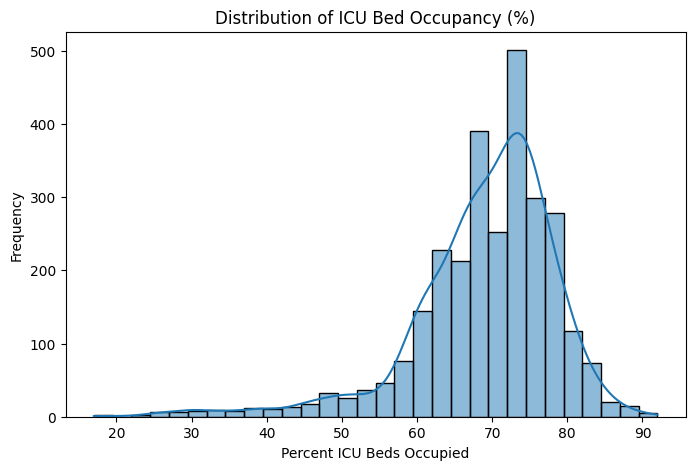

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_clean["Percent ICU Beds Occupied"], bins=30, kde=True)
plt.title("Distribution of ICU Bed Occupancy (%)")
plt.xlabel("Percent ICU Beds Occupied")
plt.ylabel("Frequency")
plt.show()


## ii- Distribution of Inpatient Bed Occupancy

This plot shows overall hospital bed usage. Unlike ICU occupancy, inpatient bed occupancy is spread out more widely, which suggests hospital demand varies a lot across different regions and seasons.


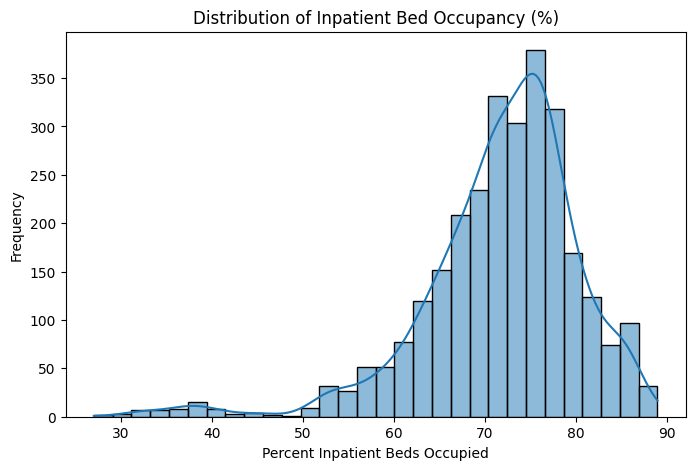

In [135]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["Percent Inpatient Beds Occupied"], bins=30, kde=True)
plt.title("Distribution of Inpatient Bed Occupancy (%)")
plt.xlabel("Percent Inpatient Beds Occupied")
plt.ylabel("Frequency")
plt.show()


# 3- Time Trends

## i- ICU Occupancy Over Time

This time-series plot shows how ICU occupancy changes over time at a national level. Clear peaks correspond to periods of heightened healthcare demand, while declines indicate recovery phases. The presence of temporal structure supports the use of lag-based machine learning models.

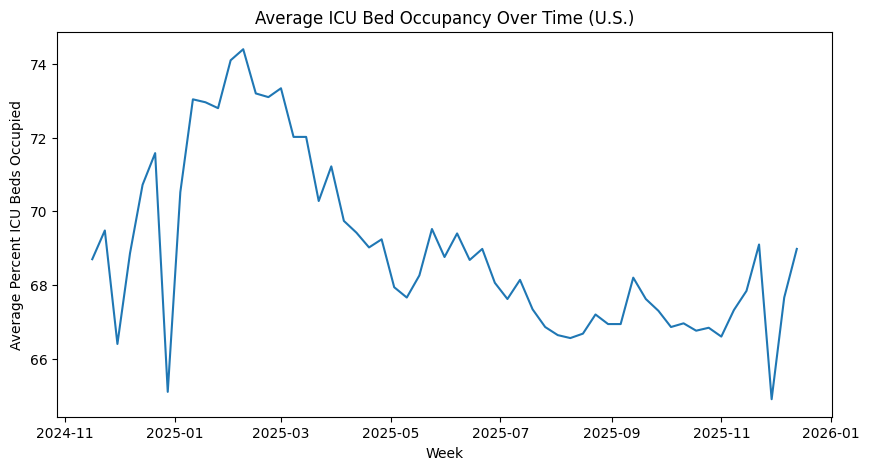

In [136]:
national_trend = (
    df_clean
    .groupby("Week Ending Date")["Percent ICU Beds Occupied"]
    .mean()
)

plt.figure(figsize=(10,5))
plt.plot(national_trend)
plt.title("Average ICU Bed Occupancy Over Time (U.S.)")
plt.xlabel("Week")
plt.ylabel("Average Percent ICU Beds Occupied")
plt.show()


## ii- Compare a Few States

This figure compares ICU occupancy trends across selected states. Differences in peak intensity and timing highlight regional variation, reinforcing the need for state-level forecasting and risk ranking.

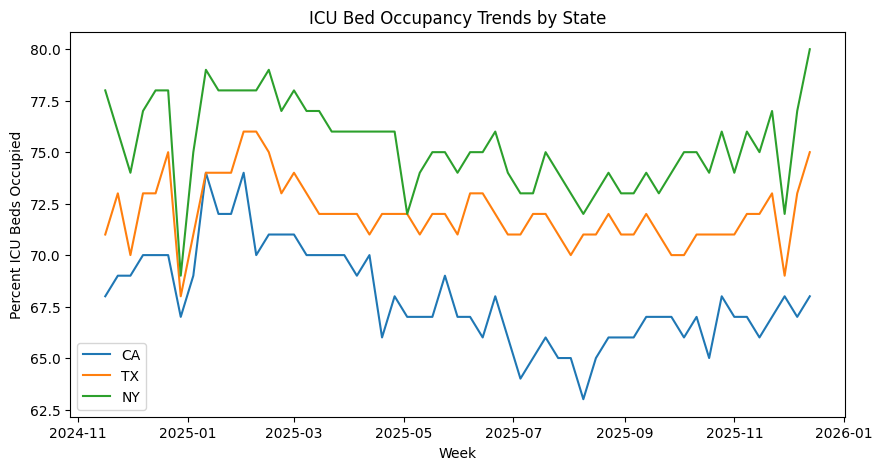

In [137]:
sample_states = ["CA", "TX", "NY"]

plt.figure(figsize=(10,5))
for state in sample_states:
    state_data = df_clean[df_clean["Geographic aggregation"] == state]
    plt.plot(
        state_data["Week Ending Date"],
        state_data["Percent ICU Beds Occupied"],
        label=state
    )

plt.legend()
plt.title("ICU Bed Occupancy Trends by State")
plt.xlabel("Week")
plt.ylabel("Percent ICU Beds Occupied")
plt.show()


# Feature Relationships
## i- ICU Occupancy vs Inpatient Occupancy

This scatter plot reveals a positive relationship between overall inpatient bed usage and ICU occupancy. As hospital demand increases, ICU utilization tends to rise as well, supporting the selection of inpatient occupancy as a predictive feature.

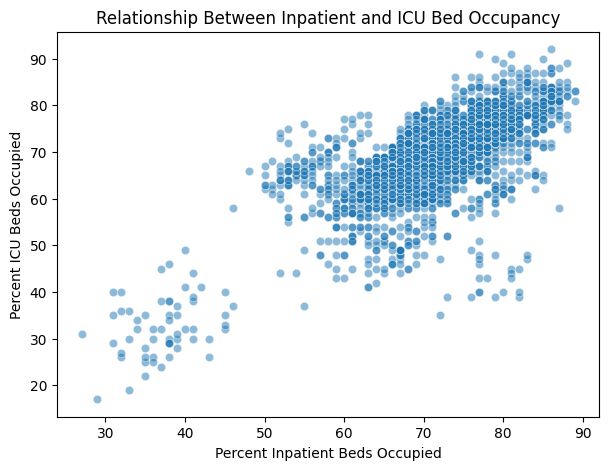

In [138]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="Percent Inpatient Beds Occupied",
    y="Percent ICU Beds Occupied",
    data=df_clean,
    alpha=0.5
)
plt.title("Relationship Between Inpatient and ICU Bed Occupancy")
plt.xlabel("Percent Inpatient Beds Occupied")
plt.ylabel("Percent ICU Beds Occupied")
plt.show()


## ii- Lag Feature Validation

This plot shows a strong relationship between ICU occupancy in consecutive weeks, confirming temporal dependency. This validates the use of lag features for predictive modeling.

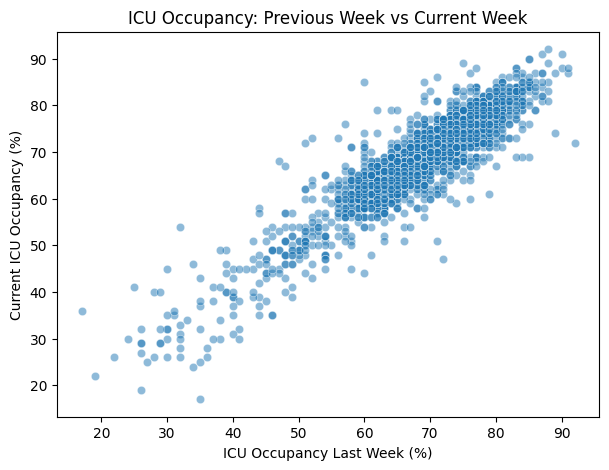

In [139]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="icu_pct_last_week",
    y="Percent ICU Beds Occupied",
    data=df_clean,
    alpha=0.5
)
plt.title("ICU Occupancy: Previous Week vs Current Week")
plt.xlabel("ICU Occupancy Last Week (%)")
plt.ylabel("Current ICU Occupancy (%)")
plt.show()


# States dataset display
## i- ICU Occupancy Heatmap (States × Time)

This step creates a heatmap to show how ICU bed occupancy (%) changes over time across the 50 U.S. states. Each row represents a state and each column represents a week-ending date, making it easy to spot patterns such as sustained high-occupancy periods, regional surges, and time windows where multiple states experienced elevated ICU stress simultaneously. This visualization provides a clear, high-level view of ICU capacity pressure across both geography and time.

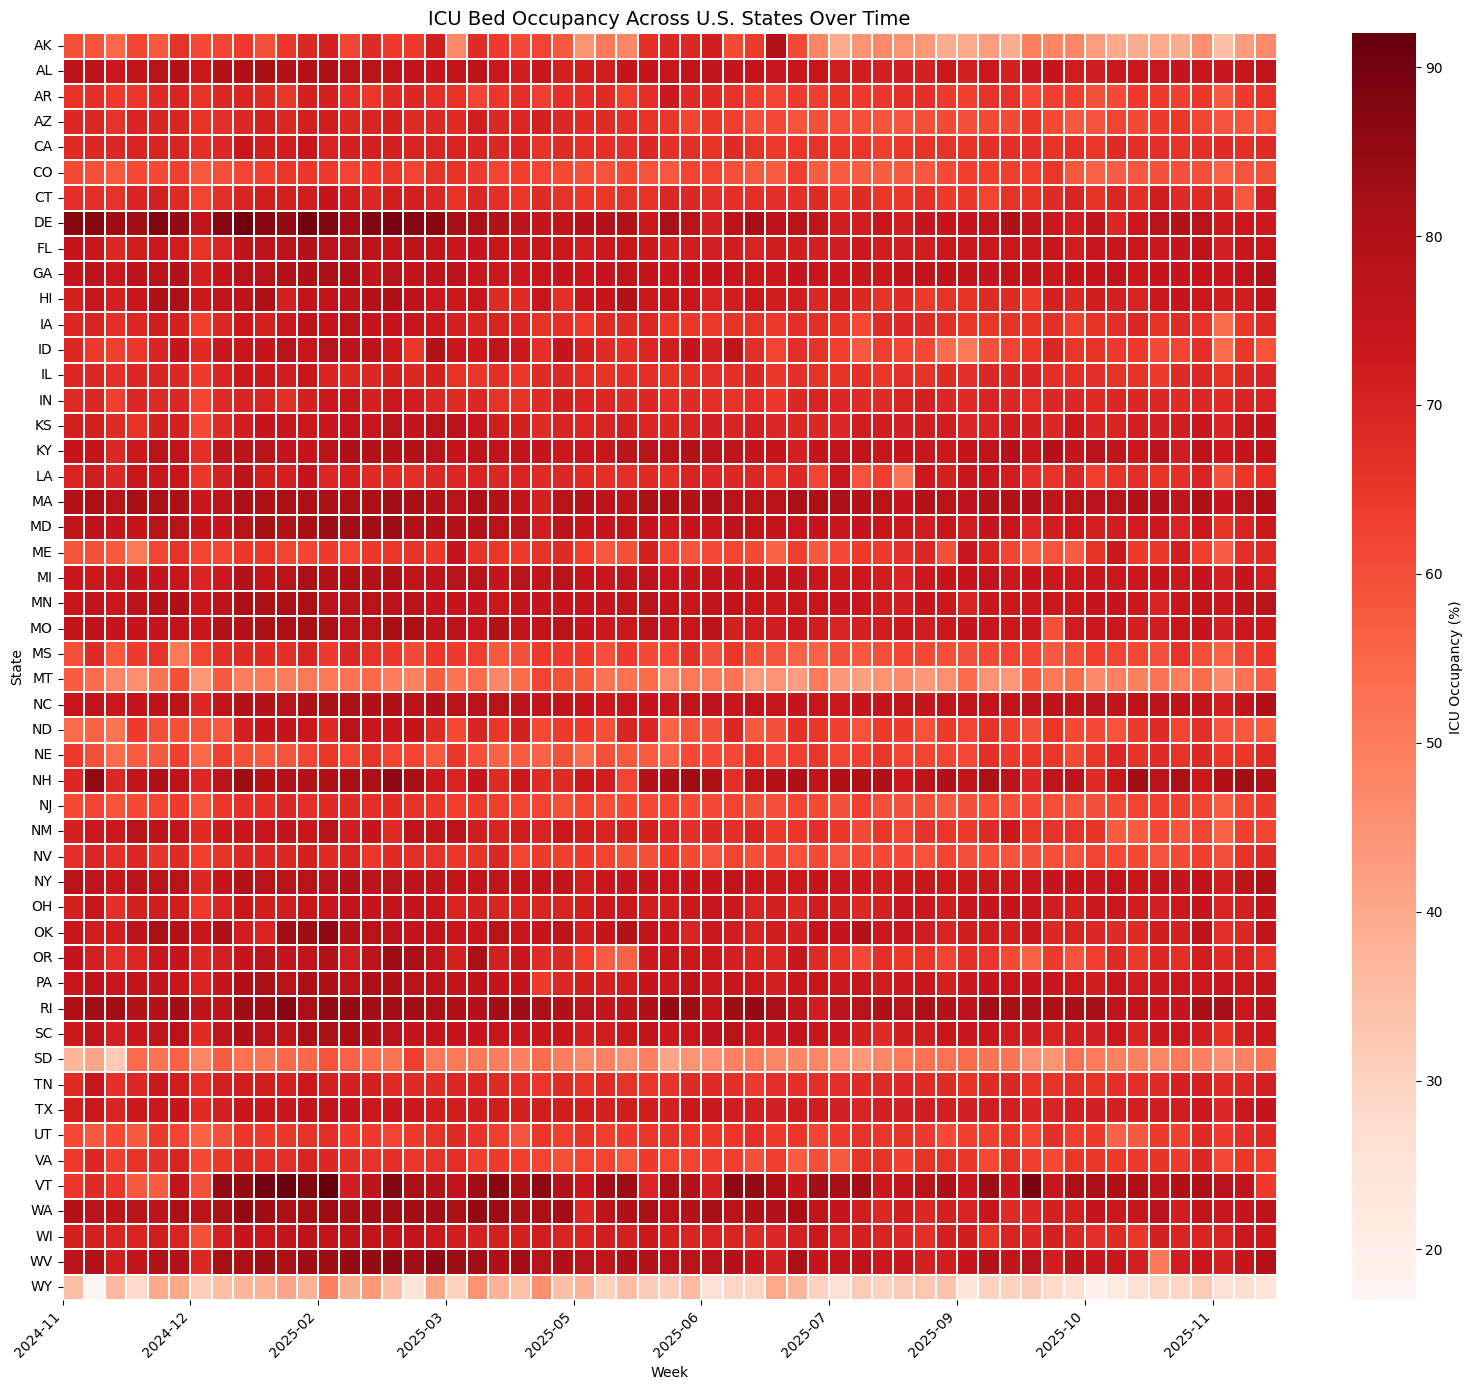

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

icu_heatmap = df_clean.pivot(
    index="Geographic aggregation",
    columns="Week Ending Date",
    values="Percent ICU Beds Occupied"
)

plt.figure(figsize=(16,14))
ax = sns.heatmap(
    icu_heatmap,
    cmap="Reds",
    cbar_kws={"label": "ICU Occupancy (%)"},
    linewidths=0.1
)

step = 6  
ax.set_xticks(np.arange(0, len(icu_heatmap.columns), step))
ax.set_xticklabels(
    icu_heatmap.columns[::step].strftime("%Y-%m"),
    rotation=45,
    ha="right"
)

plt.title("ICU Bed Occupancy Across U.S. States Over Time", fontsize=14)
plt.xlabel("Week")
plt.ylabel("State")
plt.tight_layout()
plt.show()


## ii- Inpatient Bed Occupancy Heatmap
This step generates a heatmap to track inpatient bed occupancy (%) over time across the 50 U.S. states. By organizing weeks on the x-axis and states on the y-axis, the plot highlights broad demand patterns, persistent high-occupancy states, seasonal shifts, and periods where inpatient capacity pressure rises across multiple regions. This view complements the ICU heatmap by capturing overall hospital load beyond critical care.

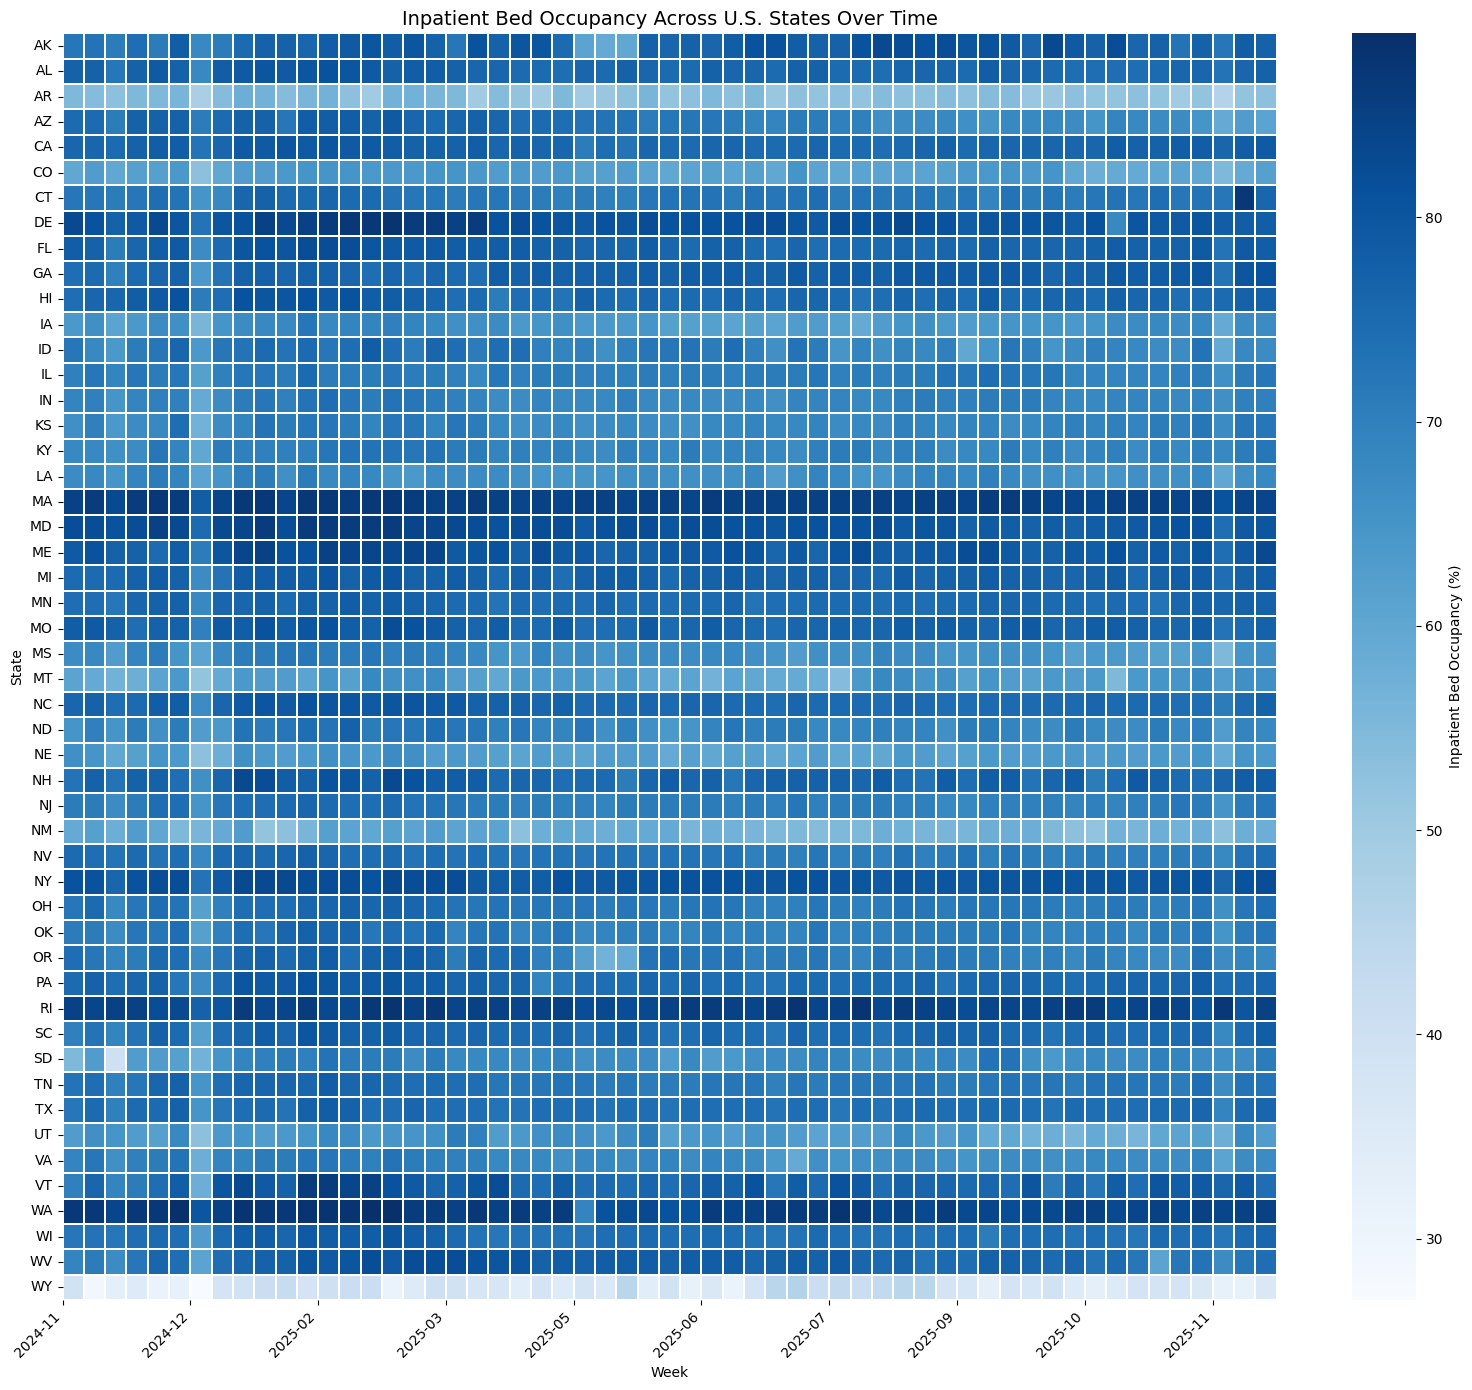

In [141]:
inpatient_heatmap = df_clean.pivot(
    index="Geographic aggregation",
    columns="Week Ending Date",
    values="Percent Inpatient Beds Occupied"
)

plt.figure(figsize=(16,14))
ax = sns.heatmap(
    inpatient_heatmap,
    cmap="Blues",
    cbar_kws={"label": "Inpatient Bed Occupancy (%)"},
    linewidths=0.1
)

ax.set_xticks(np.arange(0, len(inpatient_heatmap.columns), step))
ax.set_xticklabels(
    inpatient_heatmap.columns[::step].strftime("%Y-%m"),
    rotation=45,
    ha="right"
)

plt.title("Inpatient Bed Occupancy Across U.S. States Over Time", fontsize=14)
plt.xlabel("Week")
plt.ylabel("State")
plt.tight_layout()
plt.show()



## iii- Hospital Stress Level Heatmap

This step creates a heatmap that summarizes hospital stress levels across the 50 U.S. states over time. Instead of showing raw occupancy percentages, we visualize a stress indicator (derived from ICU and/or inpatient occupancy) to clearly identify when and where hospitals were under higher operational pressure. This makes it easier to compare states, detect widespread stress periods, and highlight sustained high-stress regions for deeper analysis and forecasting.

In [29]:
def stress_level(icu):
    if icu < 60:
        return "Normal"
    elif icu < 80:
        return "High"
    else:
        return "Critical"

df_clean["stress_level"] = df_clean["Percent ICU Beds Occupied"].apply(stress_level)


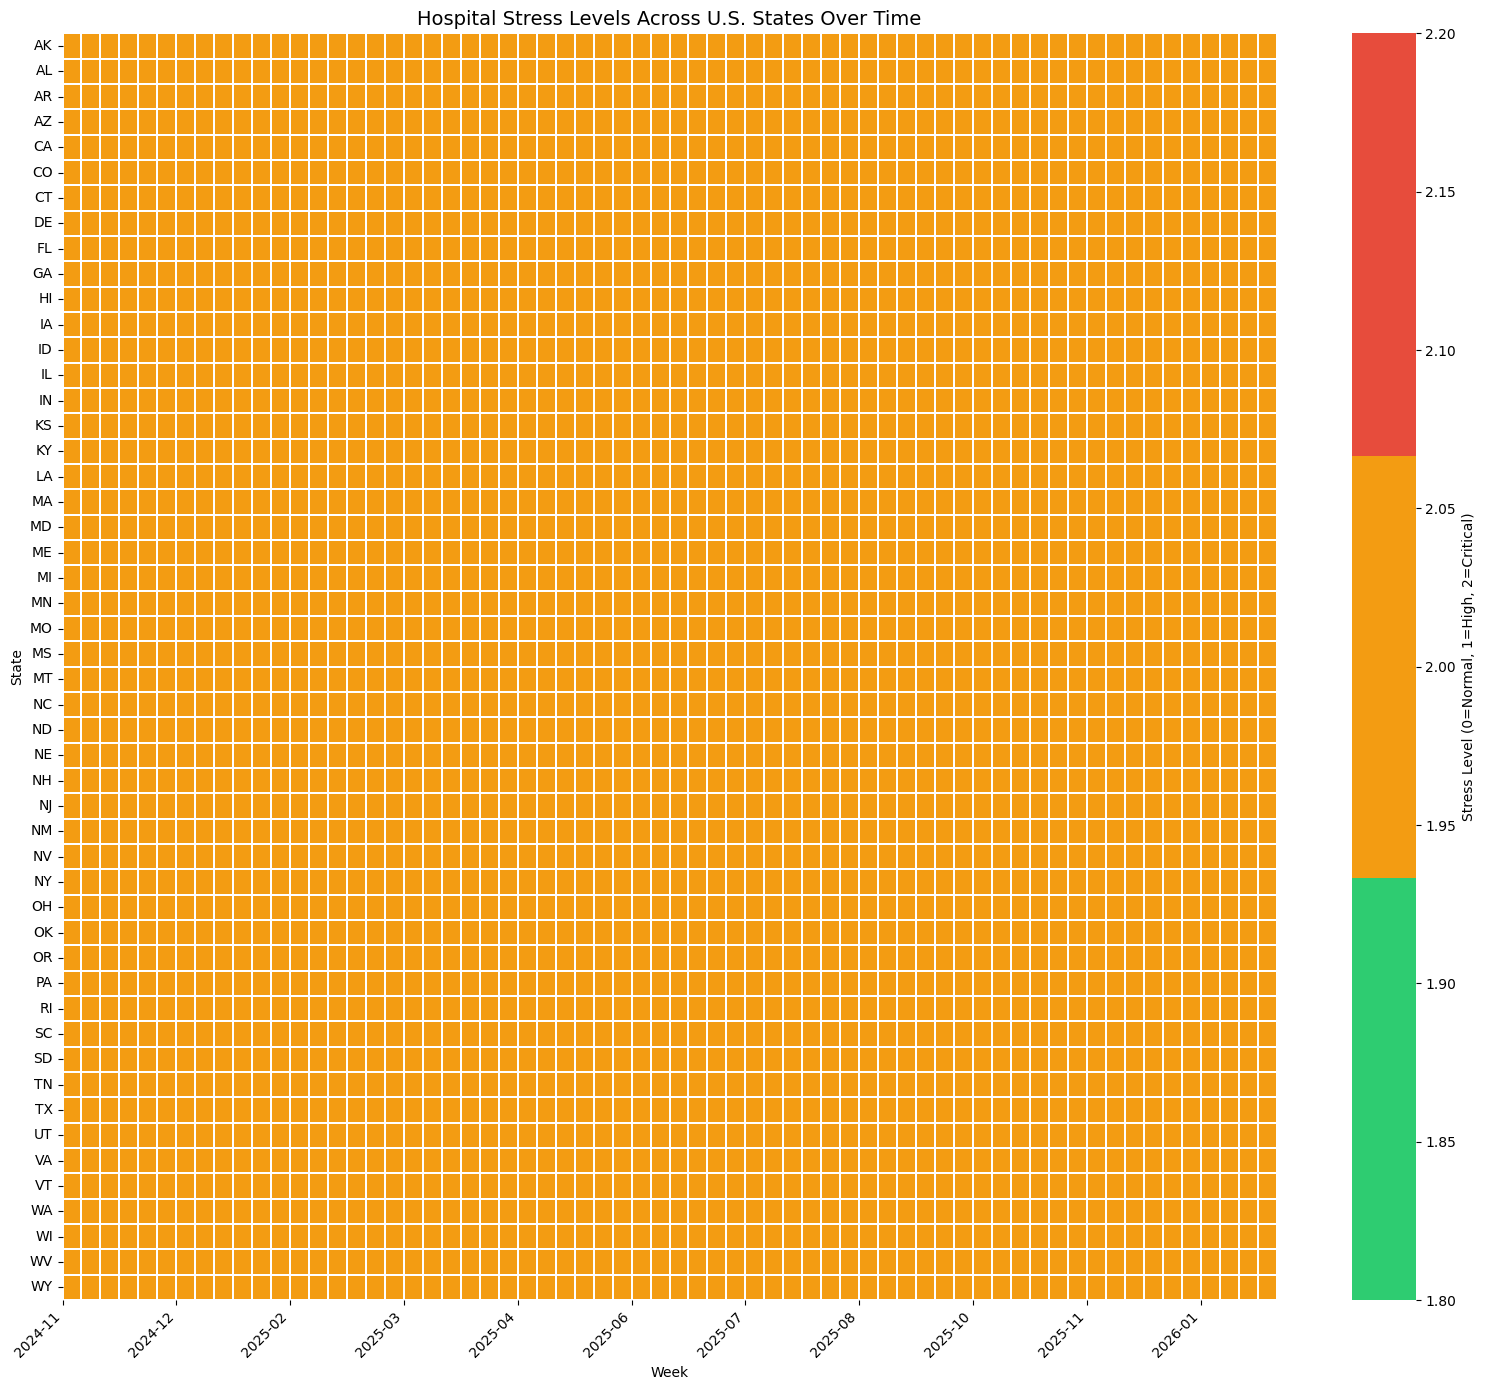

In [31]:
stress_map = {"Normal": 0, "High": 1, "Critical": 2}
df_clean["stress_code"] = df_clean["stress_level"].map(stress_map)

stress_heatmap = df_clean.pivot(
    index="Geographic aggregation",
    columns="Week Ending Date",
    values="stress_code"
)

plt.figure(figsize=(16,14))
ax = sns.heatmap(
    stress_heatmap,
    cmap=sns.color_palette(["#2ecc71", "#f39c12", "#e74c3c"]),
    cbar_kws={"label": "Stress Level (0=Normal, 1=High, 2=Critical)"},
    linewidths=0.1
)

step = 6  
ax.set_xticks(np.arange(0, len(stress_heatmap.columns), step))
ax.set_xticklabels(
    stress_heatmap.columns[::step].strftime("%Y-%m"),
    rotation=45,
    ha="right"
)

plt.title("Hospital Stress Levels Across U.S. States Over Time", fontsize=14)
plt.xlabel("Week")
plt.ylabel("State")
plt.tight_layout()
plt.show()



## iv- Rank States by Risk Using the Latest Week Snapshot
This step produces a state-by-state risk ranking using the most recent week available in the dataset. By focusing on the latest snapshot, we can quickly identify which states are currently experiencing the highest hospital pressure (based on ICU and/or inpatient occupancy) and prioritize them for monitoring, reporting, or further investigation. This ranking provides an actionable summary of the most at-risk states at the end of the time series.

C:\Users\Chaima Ben slima\AppData\Local\Temp\ipykernel_6180\2042695436.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


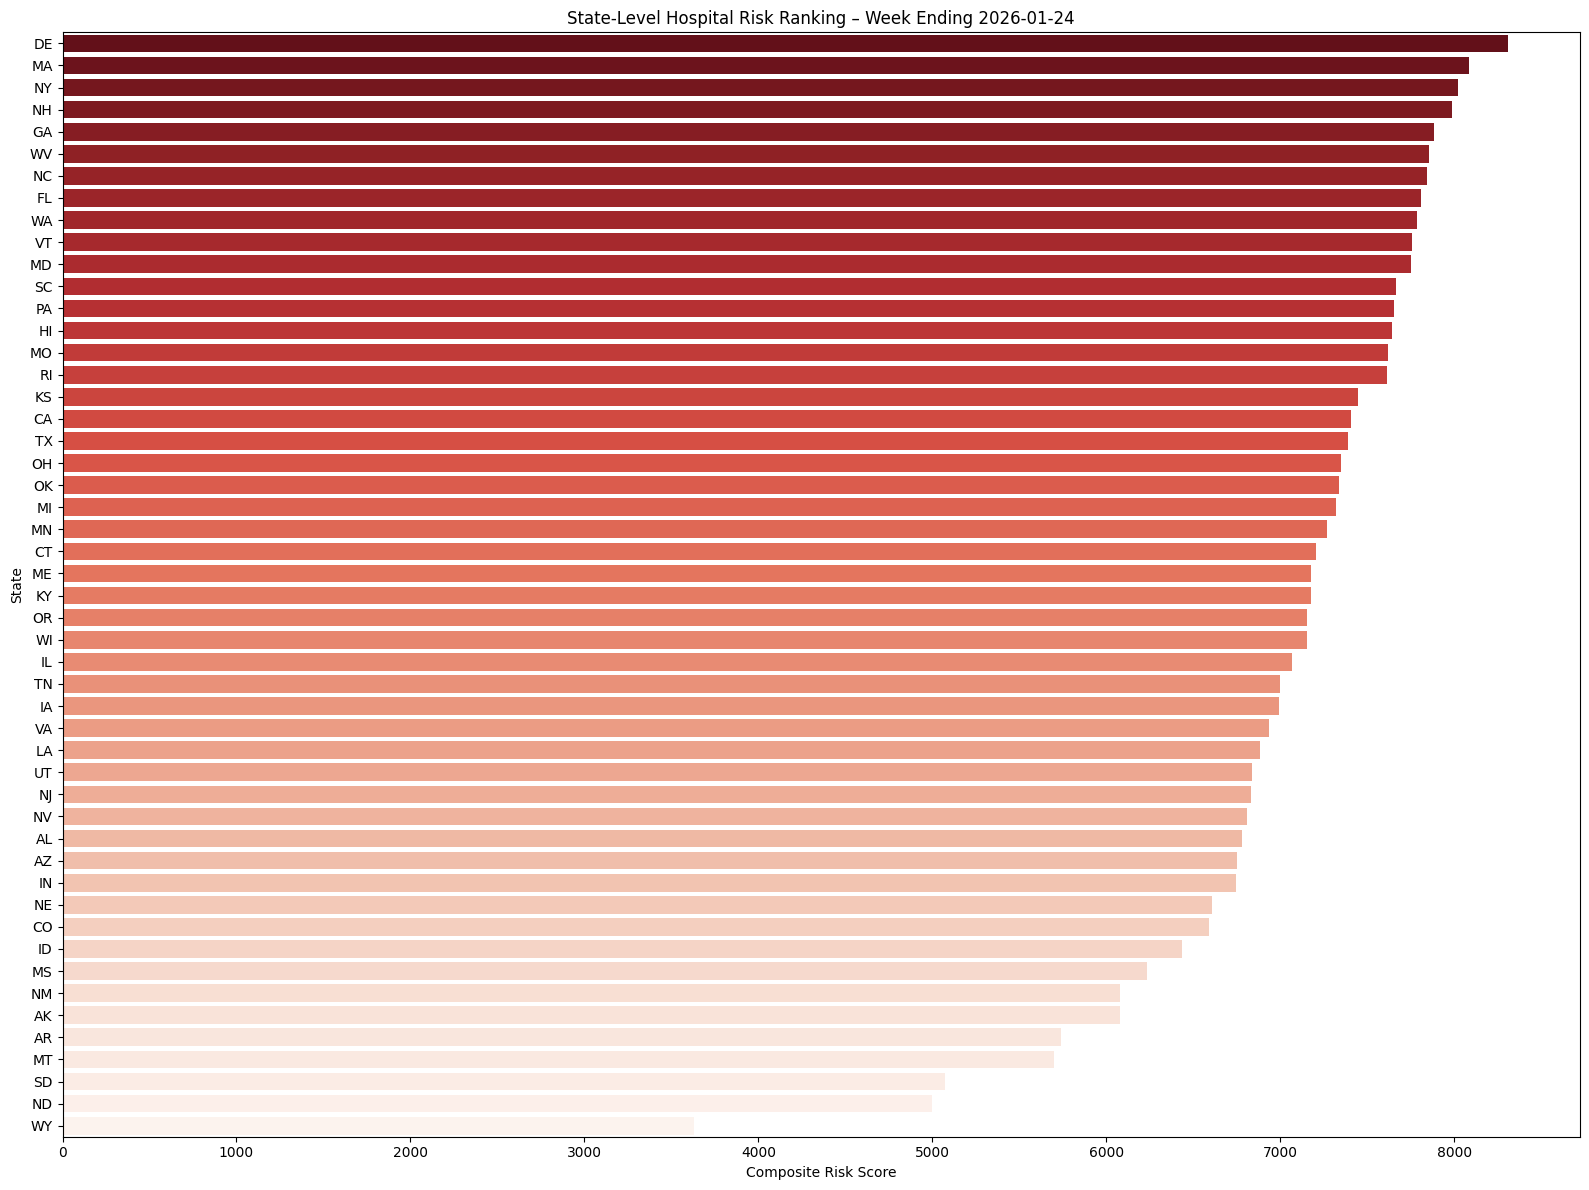

In [32]:
latest_week = df_clean["Week Ending Date"].max()

latest_states = df_clean[
    df_clean["Week Ending Date"] == latest_week
].copy()

latest_states["risk_score"] = (
    0.6 * latest_states["Percent ICU Beds Occupied"] +
    0.4 * latest_states["Percent Inpatient Beds Occupied"]
)

latest_states = latest_states.sort_values("risk_score", ascending=False)

plt.figure(figsize=(16,12))
sns.barplot(
    data=latest_states,
    y="Geographic aggregation",
    x="risk_score",
    palette="Reds_r"
)

plt.title(f"State-Level Hospital Risk Ranking – Week Ending {latest_week.date()}")
plt.xlabel("Composite Risk Score")
plt.ylabel("State")
plt.tight_layout()
plt.show()


# National trend: ICU% vs COVID/Flu/RSV ICU hospitalizations

This plot compares national ICU occupancy with ICU hospitalizations from COVID-19, Influenza, and RSV. Peaks in disease burden often align with higher ICU utilization, supporting the use of these features for forecasting and early warning.



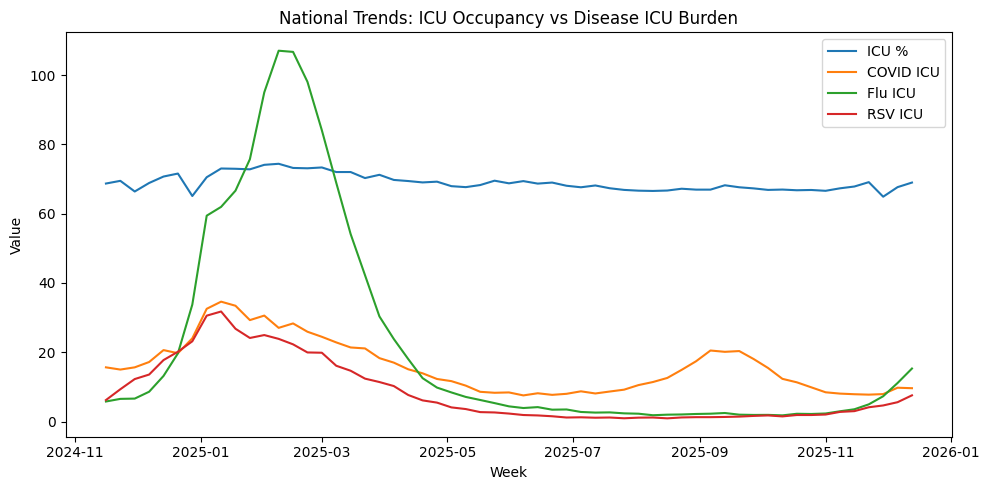

In [144]:
import matplotlib.pyplot as plt

national = df_clean.groupby("Week Ending Date").mean(numeric_only=True)

plt.figure(figsize=(10,5))
plt.plot(national.index, national["Percent ICU Beds Occupied"], label="ICU %")
plt.plot(national.index, national["Total ICU Patients Hospitalized with COVID-19"], label="COVID ICU")
plt.plot(national.index, national["Total ICU Patients Hospitalized with Influenza"], label="Flu ICU")
plt.plot(national.index, national["Total ICU Patients Hospitalized with RSV"], label="RSV ICU")
plt.title("National Trends: ICU Occupancy vs Disease ICU Burden")
plt.xlabel("Week")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


# show which disease is linked to ICU%
This correlation matrix highlights relationships between hospital occupancy and disease burden indicators. Strong positive correlations justify including RSV/Flu/COVID hospitalization variables as predictors in the forecasting model.

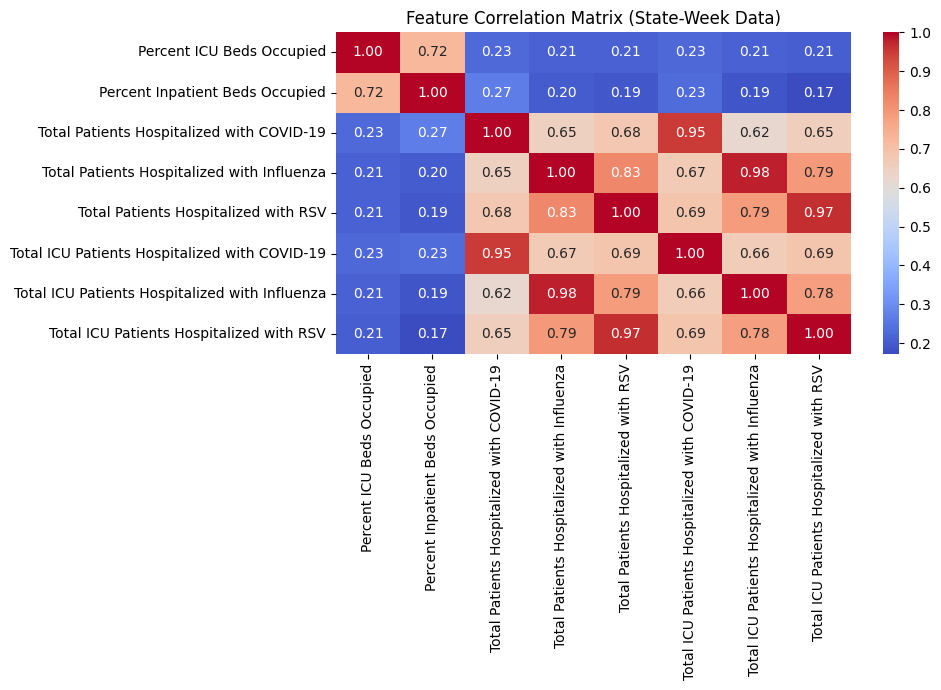

In [ ]:
import seaborn as sns

corr_cols = [
    "Percent ICU Beds Occupied",
    "Percent Inpatient Beds Occupied",
    "Total Patients Hospitalized with COVID-19",
    "Total Patients Hospitalized with Influenza",
    "Total Patients Hospitalized with RSV",
    "Total ICU Patients Hospitalized with COVID-19",
    "Total ICU Patients Hospitalized with Influenza",
    "Total ICU Patients Hospitalized with RSV",
]

corr = df_clean[corr_cols].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix (State-Week Data)")
plt.tight_layout()
plt.show()
